# **CRM iFood: Data Analyst Case**



#**This case was used in a selection process for the position of Data Analyst on the iFood Brain Team**.

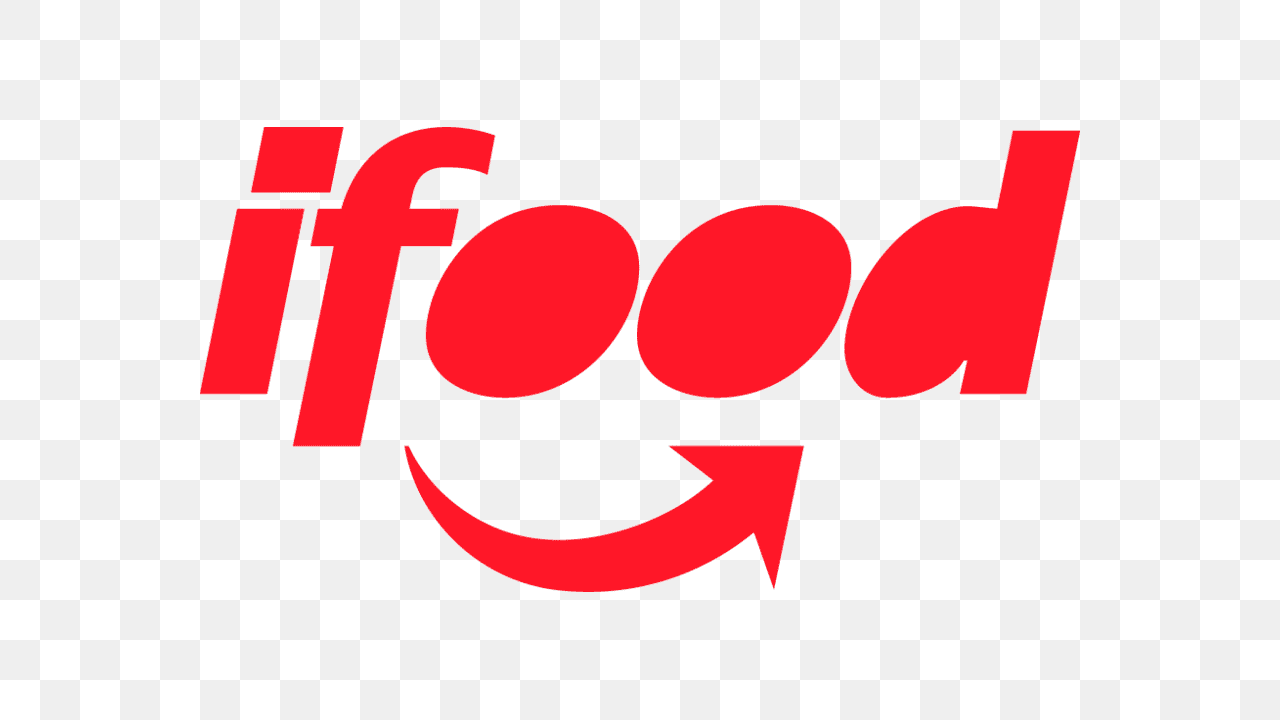


The original dataset and additional information were obtained from:

* https://www.kaggle.com/datasets/jackdaoud/marketing-data
* https://github.com/nailson/ifood-data-business-analyst-test/blob/master/README.md

It contains information about 2,205 customers, including data related to:

* Customer Profile
* Product Preferences
* Campaign Successes/Failures
* Performance of various communication and marketing channels


# Introduction

A company in the food industry is planning a marketing campaign scheduled for next month and aims to optimize its strategy to achieve the highest possible profit based on data collected from the previous campaign.

The previous campaign involved 2,205 customers, from whom personal data, behavioral data, purchase preferences, spending values, and feedback on previous campaigns were collected.


# Objective

Based on the provided data, we aim to:

1. Understand **customer characteristics and behavior** and their impact on revenue.
2. **Target** the new marketing campaign toward a **segmented audience**.
3. Develop a predictive model to **maximize the next campaign's profit**.

# Steps to follow:
To achieve this, we will:

1. **Explore** the data.
2. **Segment** the audience.
3. Recognize patterns and **build a target profile** for the next marketing campaign.

For analysis purposes, we will consider:

**Campaign Success = Higher Revenue (Higher Total Customer Spending)**

# **Legenda**

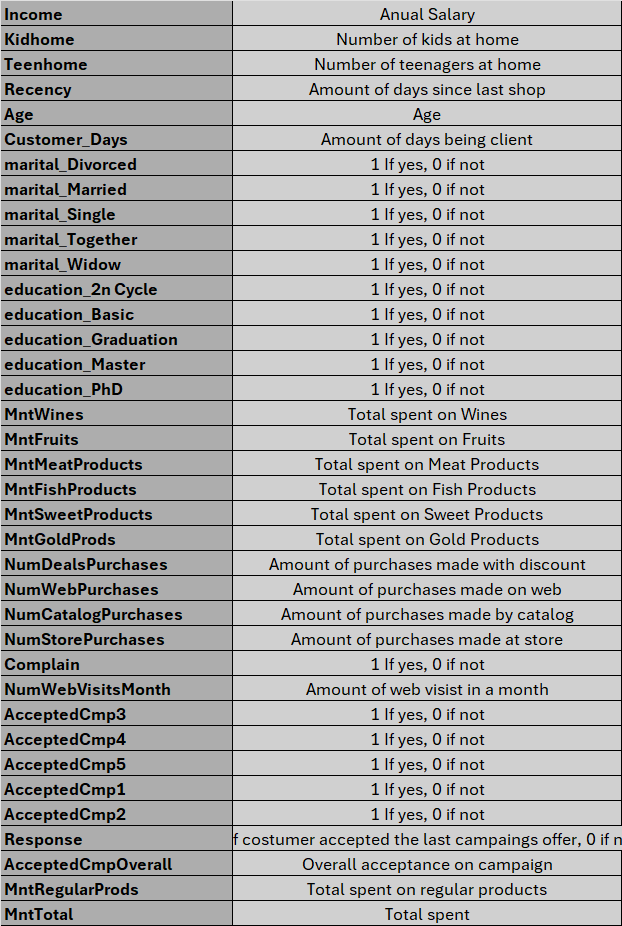

# Importing the libraries that will be used

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

# Loading and performing the preliminary analysis of the data

In [2]:
clients = pd.read_csv("ifood_df_original.csv")

In [3]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Income                2205 non-null   int64
 1   Kidhome               2205 non-null   int64
 2   Teenhome              2205 non-null   int64
 3   Recency               2205 non-null   int64
 4   MntWines              2205 non-null   int64
 5   MntFruits             2205 non-null   int64
 6   MntMeatProducts       2205 non-null   int64
 7   MntFishProducts       2205 non-null   int64
 8   MntSweetProducts      2205 non-null   int64
 9   MntGoldProds          2205 non-null   int64
 10  NumDealsPurchases     2205 non-null   int64
 11  NumWebPurchases       2205 non-null   int64
 12  NumCatalogPurchases   2205 non-null   int64
 13  NumStorePurchases     2205 non-null   int64
 14  NumWebVisitsMonth     2205 non-null   int64
 15  AcceptedCmp3          2205 non-null   int64
 16  Accept

# **With the aim of obtaining the best segmentation, this analysis will follow the principles of Pareto Analysis.**

Created by business consultant Joseph Moses Juran and widely used in areas such as Marketing, Economics, and Sciences, Pareto Analysis generally states that 20% of the factors determine, on average, 80% of the results.

Because of this, it is also known as the '80/20 Rule'.

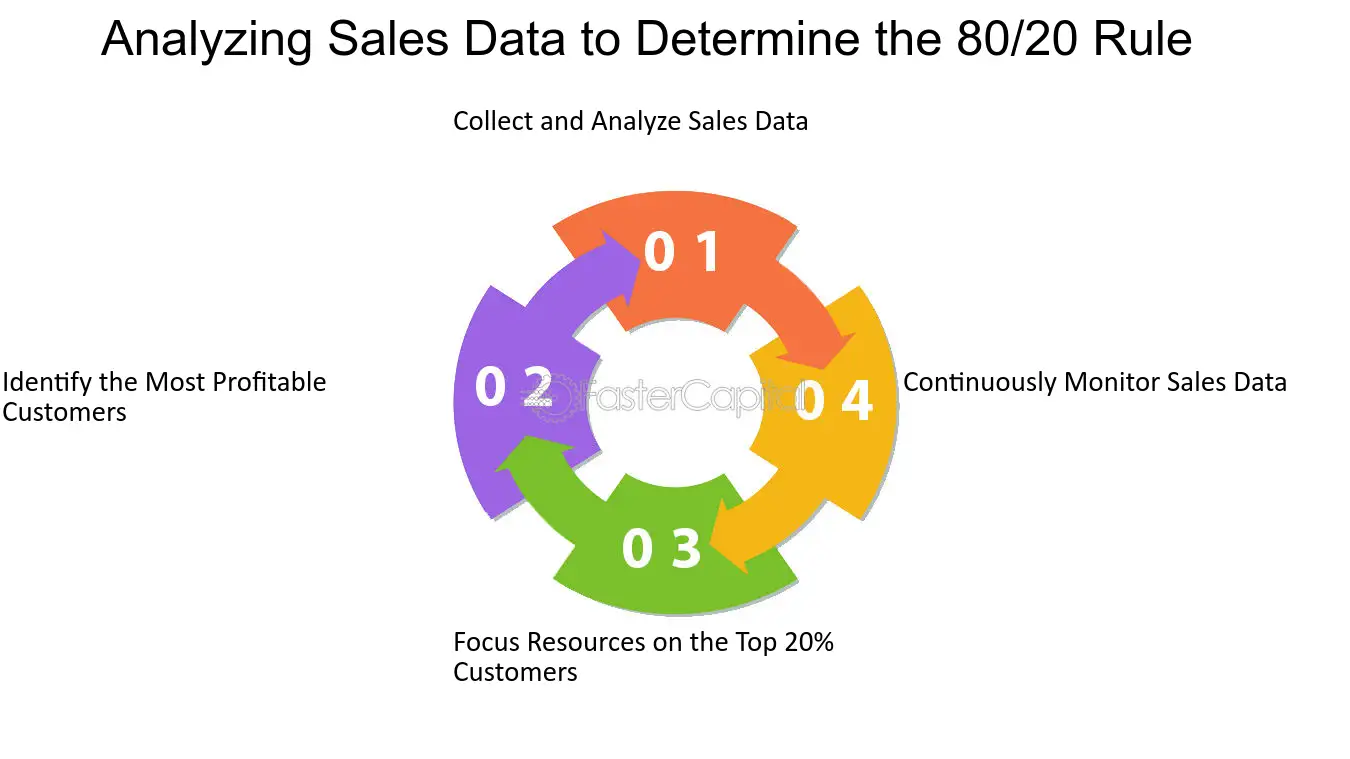

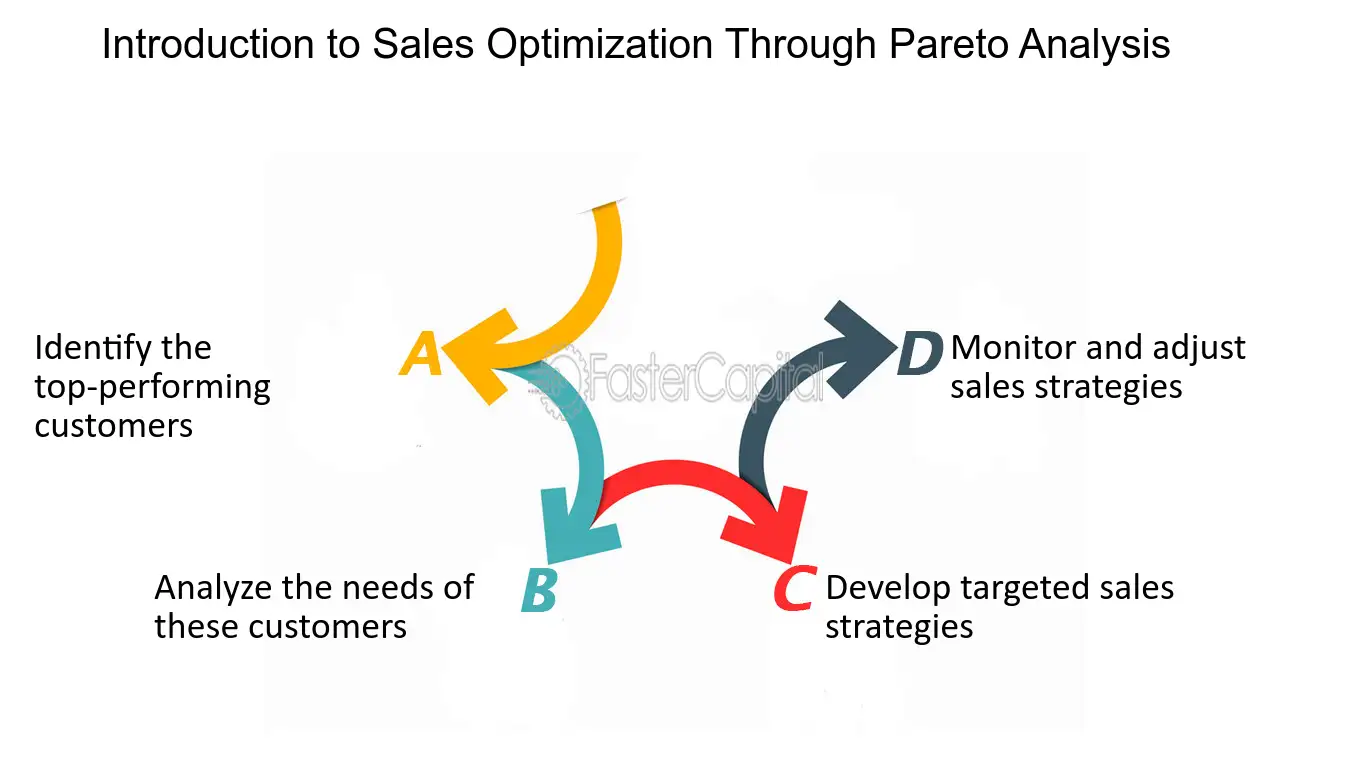

# In this regard, this analysis will follow the following steps::

1 - Select the top 20% of clients from the gathered data, that is, the **20% of clients who generated the most revenue in the last campaign** (441 out of a total of 2205).



2- **Investigate the profile of this segmen**t, so that the Marketing team can direct its strategy towards the **audience that will bring the highest possible revenue** to the campaign.

In [4]:
clients_top20 = clients['MntTotal'].sort_values(ascending = False).reset_index()[:441]
clients_top20

,index,MntTotal
0,1467,2491
1,1159,2429
2,1547,2429
3,1433,2304
4,967,2304
...,...,...
436,1426,1103
437,488,1102
438,1998,1101
439,910,1101


In [5]:
index = []
for i in range (0,441):
  a = clients_top20['index'].loc[i]
  index.append(a)


An important point is that we will filter the analysis of total spending based on the parameters we consider most useful for the Marketing team to segment a client, which we consider to be:

* Age range
* Marital status
* Time as a customer (how long they have been a client)
* Digital channel visit patterns
* Consumption patterns (what types of products they buy the most)
* Total spending

In [6]:
columns = [ 'Age',
    'marital_Divorced', 'marital_Married', 'marital_Single',
    'marital_Together', 'marital_Widow', 'Customer_Days',
    'NumWebVisitsMonth', 'MntWines', 'MntFruits',
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
    'MntTotal']


clients_top20 = {}

for col in columns:
    clients_top20[col] = clients[col].loc[index].tolist()

clients_top20 = pd.DataFrame(clients_top20)

# Age range

bins = [0, 20, 30, 40, 50, 60, float('inf')]
labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+']


clients_top20['Age_Interval'] = pd.cut(clients_top20['Age'], bins=bins, labels=labels, right=True)

In [7]:
# Marital status
conditions = [
    clients_top20['marital_Married'] == 1,
    clients_top20['marital_Single'] == 1,
    clients_top20['marital_Together'] == 1,
    clients_top20['marital_Widow'] == 1,
    clients_top20['marital_Divorced'] == 1
]

choices = ['Married', 'Single', 'Together', 'Widow', 'Divorciated']

clients_top20['Marital_Status'] = np.select(conditions, choices, default='Unknown')


In [8]:
clients_top20 = clients_top20.drop(columns = ['marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'marital_Divorced'])

In [9]:
clients_top20

,Age,Customer_Days,NumWebVisitsMonth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntTotal,Age_Interval,Marital_Status
0,32,2496,4,1259,172,815,97,148,2491,30-40,Together
1,29,2295,1,1156,120,915,94,144,2429,20-30,Single
2,29,2295,1,1156,120,915,94,144,2429,20-30,Single
3,50,2296,2,1302,68,731,89,114,2304,40-50,Single
4,51,2406,5,1394,22,708,89,91,2304,50-60,Married
...,...,...,...,...,...,...,...,...,...,...,...
436,55,2179,1,227,151,573,98,54,1103,50-60,Married
437,67,2758,6,815,10,239,28,10,1102,60+,Widow
438,55,2657,4,753,43,226,69,10,1101,50-60,Married
439,46,2241,2,471,0,510,99,21,1101,40-50,Together


In [10]:
clients_top20.describe()

,Age,Customer_Days,NumWebVisitsMonth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntTotal
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,51.986395,2560.637188,3.501134,800.730159,63.396825,484.138322,92.850340,66.253968,1507.369615
std,12.880034,205.218730,2.157571,289.978459,49.425186,241.429825,67.840524,52.622531,299.551205
min,25.000000,2162.000000,0.000000,1.000000,0.000000,45.000000,0.000000,0.000000,1099.000000
25%,42.000000,2383.000000,2.000000,563.000000,24.000000,294.000000,38.000000,24.000000,1257.000000
50%,51.000000,2591.000000,3.000000,794.000000,53.000000,449.000000,78.000000,53.000000,1467.000000
75%,62.000000,2748.000000,5.000000,1001.000000,96.000000,672.000000,145.000000,100.000000,1698.000000
max,79.000000,2856.000000,9.000000,1493.000000,194.000000,1725.000000,258.000000,198.000000,2491.000000


In [11]:
clients_top20['Customer_Days'].describe()

,Customer_Days
count,441.000000
mean,2560.637188
std,205.218730
min,2162.000000
25%,2383.000000
50%,2591.000000
75%,2748.000000
max,2856.000000


# Analysis #1 :	What is the distribution of the top 20% of clients with the highest spending across all products by age?

In [12]:
amount_per_age = clients_top20.groupby('Age_Interval')['MntTotal'].count().sort_values(ascending = False).reset_index()
amount_per_age['%'] = round((amount_per_age['MntTotal'] / amount_per_age['MntTotal'].sum()* 100), 2)
amount_per_age.rename(columns = {'MntTotal' : 'Count'}, inplace = True)

amount_per_age

<ipython-input-12-aa12d5549558>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  amount_per_age = clients_top20.groupby('Age_Interval')['MntTotal'].count().sort_values(ascending = False).reset_index()


,Age_Interval,Count,%
0,60+,134,30.39
1,40-50,117,26.53
2,50-60,94,21.32
3,30-40,76,17.23
4,20-30,20,4.54
5,0-20,0,0.00


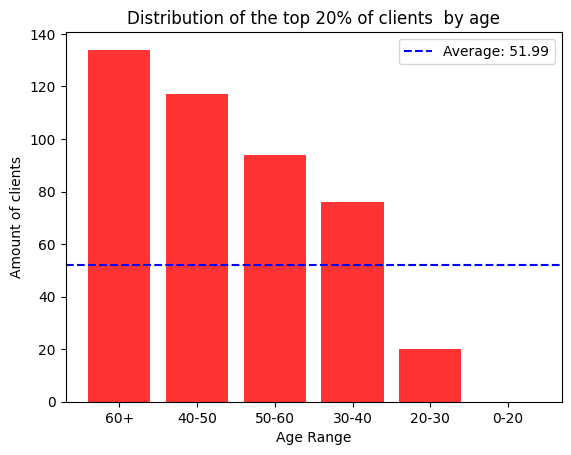

In [13]:
average_count = clients_top20['Age'].mean()
plt.bar(amount_per_age['Age_Interval'], amount_per_age['Count'], color = '#FF3333')
plt.axhline(y=average_count, color='blue', linestyle='--', label=f'Average: {average_count:.2f}')
plt.xlabel('Age Range')
plt.ylabel('Amount of clients')
plt.title('Distribution of the top 20% of clients  by age')
plt.legend()

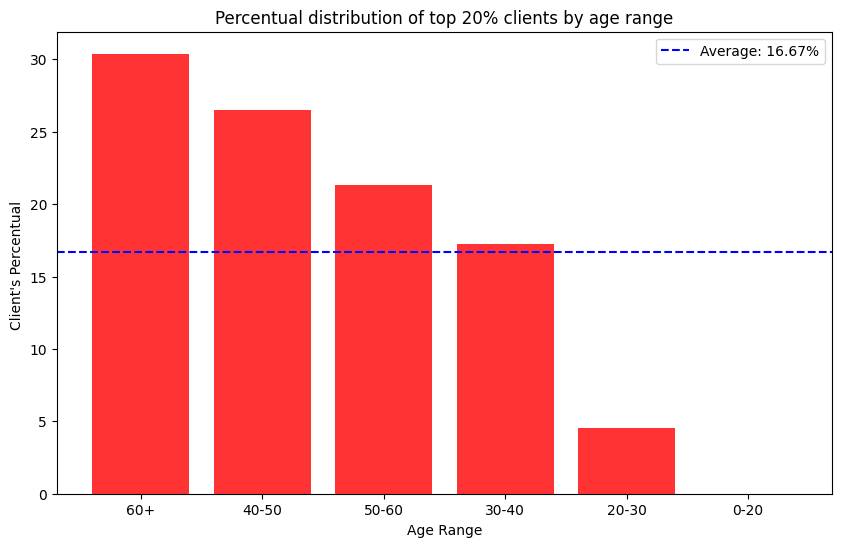

In [14]:
average_percentage = amount_per_age['%'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
plt.bar(amount_per_age['Age_Interval'], amount_per_age['%'], color='#FF3333')
plt.title('Distribution of Age Intervals among Top 20% Clients')
plt.xlabel('Age Range')
plt.ylabel("Client's Percentual ")

# Add a horizontal line for the average
plt.axhline(y=average_percentage, color='blue', linestyle='--', label=f'Average: {average_percentage:.2f}%')
plt.legend() # Show the legend
plt.title('Percentual distribution of top 20% clients by age range')

plt.show()

# Analysis #2 : What is the distribution of the top 20% of clients with the highest spending across all products by marital status?

In [15]:
marital_status_distribution = clients_top20.groupby('Marital_Status')['MntTotal'].count().sort_values(ascending = False).reset_index()
marital_status_distribution.rename(columns = {'MntTotal' : 'Count'}, inplace = True)
marital_status_distribution['%'] = round((marital_status_distribution['Count'] / marital_status_distribution['Count'].sum()* 100), 2)

marital_status_distribution

,Marital_Status,Count,%
0,Married,169,38.32
1,Together,111,25.17
2,Single,103,23.36
3,Divorciated,42,9.52
4,Widow,16,3.63


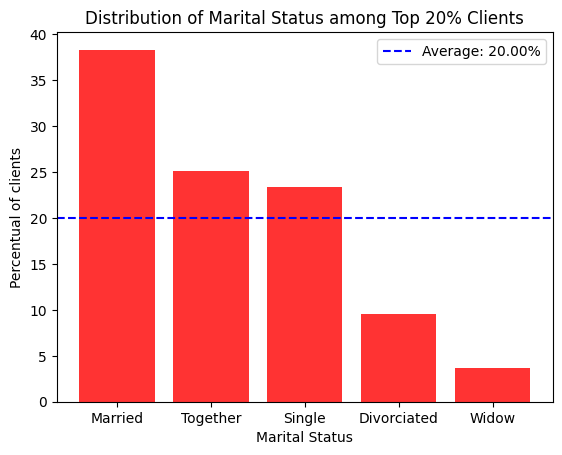

In [16]:
average_percentage = marital_status_distribution['%'].mean()


plt.bar(marital_status_distribution['Marital_Status'], marital_status_distribution['%'], color = '#FF3333')
plt.axhline(y=average_percentage, color='blue', linestyle='--', label=f'Average: {average_percentage:.2f}%')
plt.title('Distribution of Marital Status among Top 20% Clients')
plt.xlabel('Marital Status')
plt.ylabel('Percentual of clients')

plt.legend()

# Analysis #3 : What is the distribution of the top 20% of clients with the highest spending across all products by length of time as a customer?

Text(13.819444444444445, 0.5, 'Amount of clients')

<Figure size 1500x600 with 0 Axes>

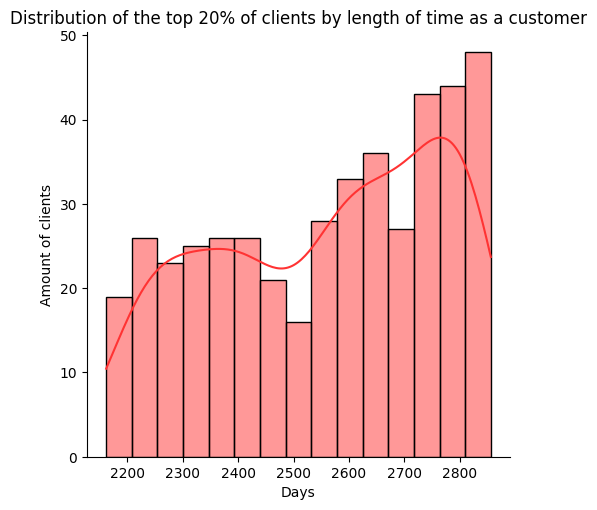

In [17]:
plt.figure(figsize=(15, 6))
sns.displot(data = clients_top20, x = 'Customer_Days', bins = 15, kde = True, color = '#FF3333')
plt.title('Distribution of the top 20% of clients by length of time as a customer')
plt.xlabel('Days')
plt.ylabel('Amount of clients')

# Analysis 4 : What is the distribution of the top 20% of clients with the highest spending across all products by number of monthly visits to the website?"

In [18]:
NumWebVisitsMonth_distribution = clients_top20.groupby('NumWebVisitsMonth')['MntTotal'].count().sort_values(ascending = False).reset_index()
NumWebVisitsMonth_distribution.rename(columns = {'MntTotal' : 'Count'}, inplace = True)
NumWebVisitsMonth_distribution

,NumWebVisitsMonth,Count
0,2,100
1,3,83
2,1,80
3,6,51
4,4,41
5,5,34
6,8,28
7,7,19
8,0,3
9,9,2


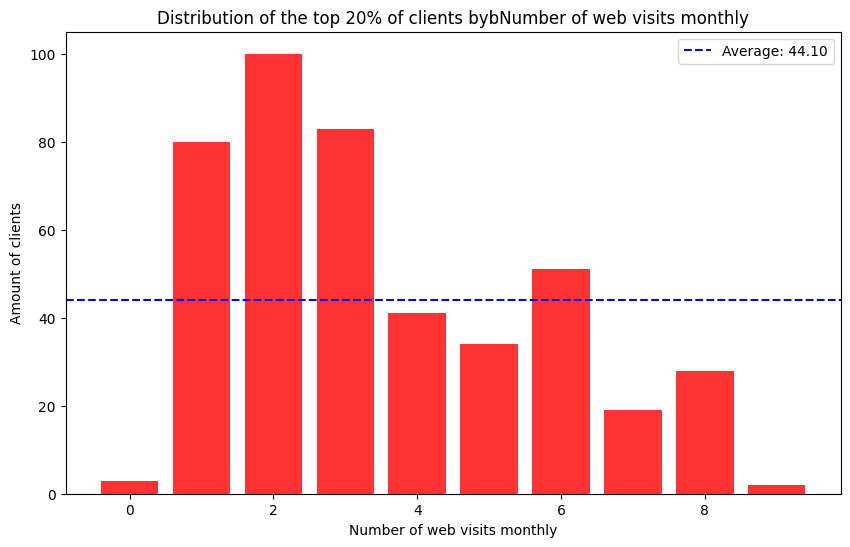

In [19]:
average_count = NumWebVisitsMonth_distribution['Count'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
plt.bar(NumWebVisitsMonth_distribution['NumWebVisitsMonth'], NumWebVisitsMonth_distribution['Count'], color='#FF3333')
plt.xlabel('Number of web visits monthly')
plt.ylabel('Amount of clients') # Corrected y-axis label
plt.title('Distribution of the top 20% of clients bybNumber of web visits monthly')

# Add a horizontal line for the average
plt.axhline(y=average_count, color='blue', linestyle='--', label=f'Average: {average_count:.2f}')
plt.legend() # Show the legend

plt.show()

# Analysis 5 : What is the distribution of the top 20% of clients with the highest spending across all products by wine purchases?

In [20]:
# Adding wine's consumption range into the DataFrame

bins = [0, 200, 400, 600, 800, 1000, 1200, 1400, float('inf')]
labels = ['0-200', '200-400', '400-600', '600-800', '800-1000', '1000-1200', '1200-1400', '1400+']


clients_top20['MntWines_Interval'] = pd.cut(clients_top20['MntWines'], bins=bins, labels=labels, right=True)

In [21]:
MntWines_distribution = clients_top20.groupby('MntWines_Interval')['MntTotal'].count().sort_values(ascending = True).reset_index()
MntWines_distribution.rename(columns = {'MntTotal' : 'Count'}, inplace = True)
MntWines_distribution

<ipython-input-21-82a565469500>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  MntWines_distribution = clients_top20.groupby('MntWines_Interval')['MntTotal'].count().sort_values(ascending = True).reset_index()


,MntWines_Interval,Count
0,0-200,1
1,1400+,9
2,1200-1400,33
3,200-400,37
4,1000-1200,69
5,400-600,89
6,600-800,99
7,800-1000,104


In [22]:
MntWines_distribution.describe()

,Count
count,8.000000
mean,55.125000
std,40.583028
min,1.000000
25%,27.000000
50%,53.000000
75%,91.500000
max,104.000000


In [23]:
MntWines_distribution

,MntWines_Interval,Count
0,0-200,1
1,1400+,9
2,1200-1400,33
3,200-400,37
4,1000-1200,69
5,400-600,89
6,600-800,99
7,800-1000,104


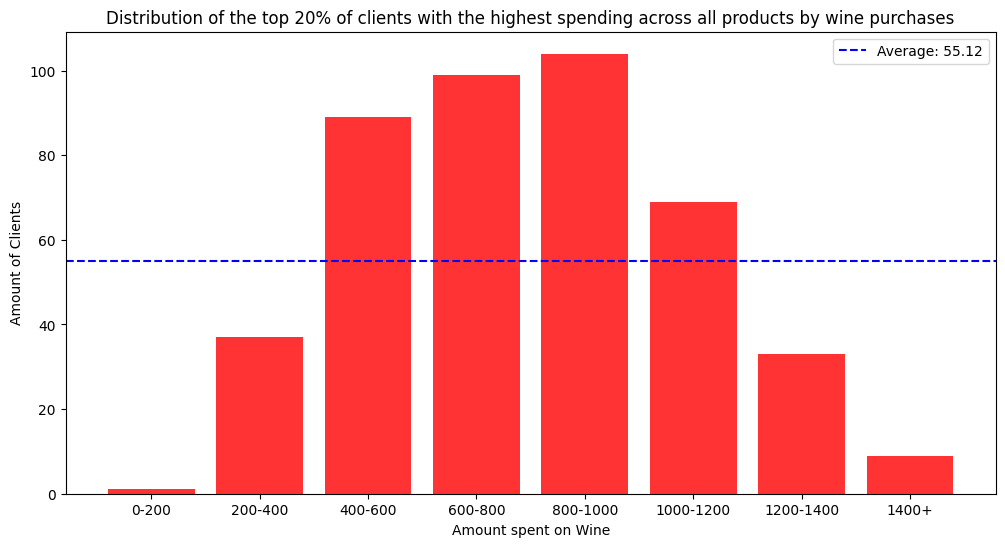

In [24]:
desired_order = ['0-200', '200-400', '400-600', '600-800', '800-1000', '1000-1200', '1200-1400', '1400+']
MntWines_distribution['MntWines_Interval'] = pd.Categorical(MntWines_distribution['MntWines_Interval'], categories=desired_order, ordered=True)
MntWines_distribution = MntWines_distribution.sort_values('MntWines_Interval')

average_count = MntWines_distribution['Count'].mean()

plt.figure(figsize=(12, 6))
plt.bar(MntWines_distribution['MntWines_Interval'], MntWines_distribution['Count'], color = '#FF3333')
plt.axhline(y=average_count, color='blue', linestyle='--', label=f'Average: {average_count:.2f}')
plt.xlabel('Amount spent on Wine')
plt.ylabel('Amount of Clients')
plt.title('Distribution of the top 20% of clients with the highest spending across all products by wine purchases')
plt.legend()
plt.show()

# Analysis 6: What is the distribution of the top 20% of clients with the highest spending across all products by fruit purchases?

In [25]:
MntFruits_distribution = clients_top20.groupby('MntFruits')['MntTotal'].count().sort_values(ascending = True).reset_index()
MntFruits_distribution.rename(columns = {'MntTotal' : 'Count'}, inplace = True)
MntFruits_distribution

,MntFruits,Count
0,149,1
1,126,1
2,88,1
3,130,1
4,83,1
...,...,...
112,19,9
113,26,10
114,80,13
115,12,16


In [26]:
MntFruits_distribution.describe()

,MntFruits,Count
count,117.000000,117.000000
mean,85.743590,3.769231
std,52.581653,3.977056
min,0.000000,1.000000
25%,40.000000,2.000000
50%,79.000000,3.000000
75%,130.000000,5.000000
max,194.000000,37.000000


In [27]:
bins = [0, 25, 50, 75, 100, 125, 150, 175, float('inf')]
labels = ['0-25', '25-50', '50-75', '75-100', '100-125', '125-150', '150-175', '175+']


clients_top20['MntFruits_Interval'] = pd.cut(clients_top20['MntFruits'], bins=bins, labels=labels, right=True)

In [28]:
MntFruits_distribution = clients_top20.groupby('MntFruits_Interval')['MntTotal'].count().sort_values(ascending = True).reset_index()
MntFruits_distribution.rename(columns = {'MntTotal' : 'Count'}, inplace = True)
MntFruits_distribution

<ipython-input-28-a28af8235eae>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  MntFruits_distribution = clients_top20.groupby('MntFruits_Interval')['MntTotal'].count().sort_values(ascending = True).reset_index()


,MntFruits_Interval,Count
0,175+,11
1,150-175,21
2,100-125,33
3,125-150,36
4,75-100,56
5,50-75,71
6,0-25,83
7,25-50,93


Text(0.5, 1.0, 'Distribution of the top 20% of clients by fruits purchases')

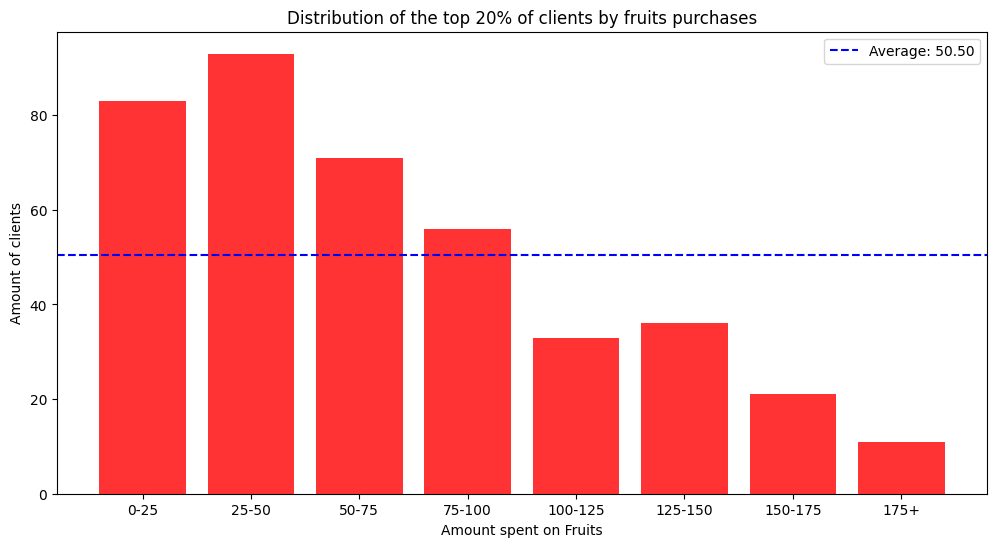

In [29]:
desired_order = labels = ['0-25', '25-50', '50-75', '75-100', '100-125', '125-150', '150-175', '175+']
MntFruits_distribution['MntFruits_Interval'] = pd.Categorical(MntFruits_distribution['MntFruits_Interval'], categories=desired_order, ordered=True)
MntFruits_distribution = MntFruits_distribution.sort_values('MntFruits_Interval')

average_count = MntFruits_distribution['Count'].mean()


plt.figure(figsize=(12, 6))
plt.bar(MntFruits_distribution['MntFruits_Interval'], MntFruits_distribution['Count'], color = '#FF3333')
plt.axhline(y=average_count, color='blue', linestyle='--', label=f'Average: {average_count:.2f}')
plt.xlabel('Amount spent on Fruits')
plt.ylabel('Amount of clients')
plt.legend()
plt.title('Distribution of the top 20% of clients by fruits purchases')

# Analysis 7: What is the distribution of the top 20% of clients with the highest spending across all products by meat-based product purchases?

In [30]:
clients_top20['MntMeatProducts'].describe()

,MntMeatProducts
count,441.000000
mean,484.138322
std,241.429825
min,45.000000
25%,294.000000
50%,449.000000
75%,672.000000
max,1725.000000


In [31]:
bins = [0, 250, 500, 750, 1000, 1250, 1500, 1750, float('inf')]
labels = ['0-250', '250-500', '500-750', '750-1000', '1000-1250', '1250-150', '1500-1750', '1750+']


clients_top20['MntMeatProducts_Interval'] = pd.cut(clients_top20['MntMeatProducts'], bins=bins, labels=labels, right=True)

In [32]:
MntMeatProducts_distribution = clients_top20.groupby('MntMeatProducts_Interval')['MntTotal'].count().sort_values(ascending = True).reset_index()
MntMeatProducts_distribution.rename(columns = {'MntTotal' : 'Count'}, inplace = True)
MntMeatProducts_distribution

<ipython-input-32-0297a0aa397d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  MntMeatProducts_distribution = clients_top20.groupby('MntMeatProducts_Interval')['MntTotal'].count().sort_values(ascending = True).reset_index()


,MntMeatProducts_Interval,Count
0,1000-1250,0
1,1250-150,0
2,1750+,0
3,1500-1750,1
4,750-1000,73
5,0-250,81
6,500-750,118
7,250-500,168


Text(0.5, 1.0, 'Distribution of the top 20% of clients by meat purchases')

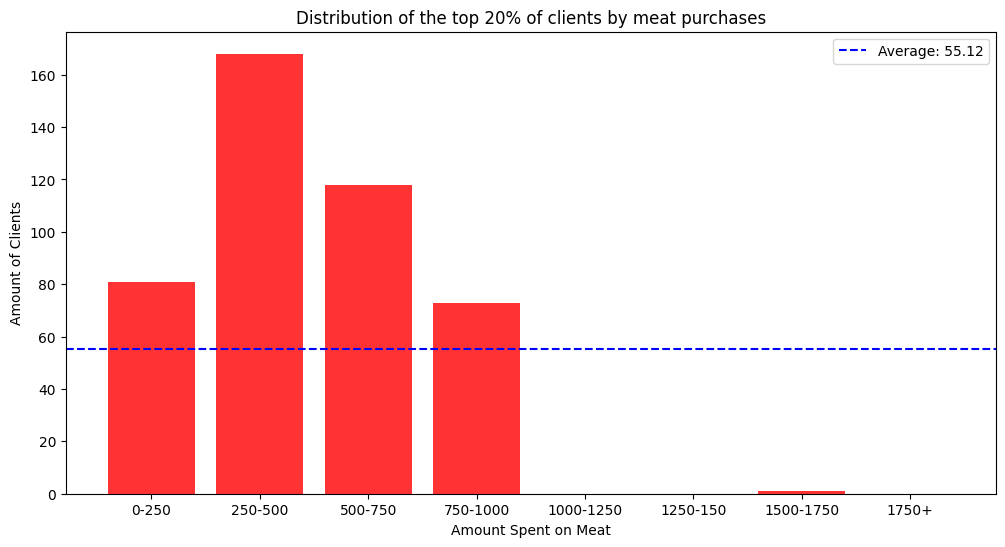

In [33]:
desired_order = ['0-250', '250-500', '500-750', '750-1000', '1000-1250', '1250-150', '1500-1750', '1750+']
MntMeatProducts_distribution['MntMeatProducts_Interval'] = pd.Categorical(MntMeatProducts_distribution['MntMeatProducts_Interval'], categories=desired_order, ordered=True)
MntMeatProducts_distribution = MntMeatProducts_distribution.sort_values('MntMeatProducts_Interval')

average_count = MntMeatProducts_distribution['Count'].mean()

plt.figure(figsize=(12, 6))
plt.bar(MntMeatProducts_distribution['MntMeatProducts_Interval'], MntMeatProducts_distribution['Count'], color = '#FF3333')
plt.axhline(y=average_count, color='blue', linestyle='--', label=f'Average: {average_count:.2f}')
plt.xlabel('Amount Spent on Meat')
plt.ylabel('Amount of Clients')
plt.legend()
plt.title('Distribution of the top 20% of clients by meat purchases')

# Analysis 8: What is the distribution of the top 20% of clients with the highest spending across all products by fish-based product purchases??

In [34]:
clients_top20['MntFishProducts'].describe()

,MntFishProducts
count,441.000000
mean,92.850340
std,67.840524
min,0.000000
25%,38.000000
50%,78.000000
75%,145.000000
max,258.000000


In [35]:
bins = [0, 50, 100, 150, 200, 250, float('inf')]
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250+']


clients_top20['MntFishProducts_Interval'] = pd.cut(clients_top20['MntFishProducts'], bins=bins, labels=labels, right=True)

In [36]:
MntFishProducts_Distribution = clients_top20.groupby('MntFishProducts_Interval')['MntTotal'].count().sort_values(ascending = True).reset_index()
MntFishProducts_Distribution.rename(columns = {'MntTotal' : 'Count'}, inplace = True)
MntFishProducts_Distribution

<ipython-input-36-fb7af8bfb3f5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  MntFishProducts_Distribution = clients_top20.groupby('MntFishProducts_Interval')['MntTotal'].count().sort_values(ascending = True).reset_index()


,MntFishProducts_Interval,Count
0,250+,3
1,200-250,42
2,150-200,49
3,100-150,74
4,50-100,120
5,0-50,121


Text(0.5, 1.0, 'Distribution of the top 20% of clients by fish purchases')

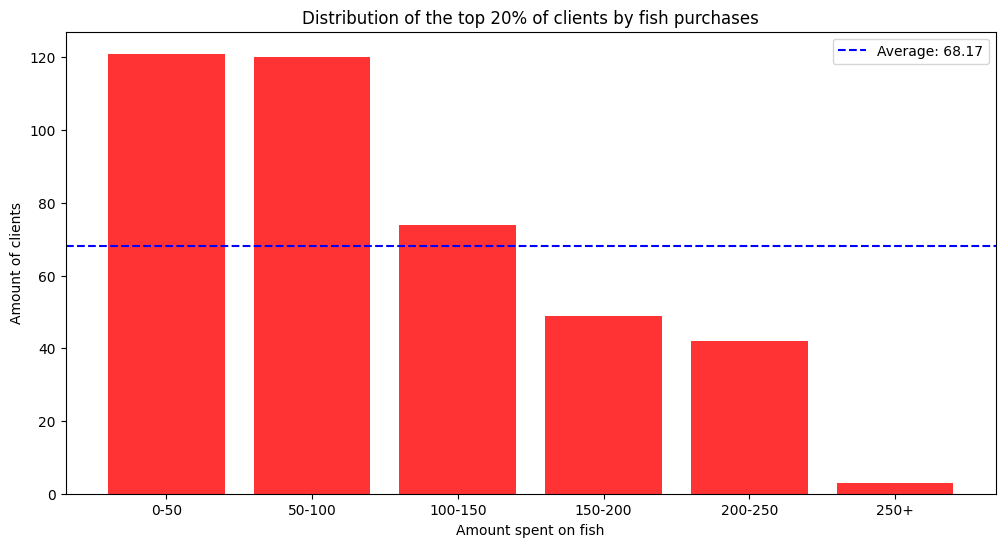

In [37]:
desired_order = ['0-50', '50-100', '100-150', '150-200', '200-250', '250+']
average_count = MntFishProducts_Distribution['Count'].mean()

MntFishProducts_Distribution['MntFishProducts_Interval'] = pd.Categorical(MntFishProducts_Distribution['MntFishProducts_Interval'], categories=desired_order, ordered=True)
MntFishProducts_Distribution = MntFishProducts_Distribution.sort_values('MntFishProducts_Interval')

plt.figure(figsize=(12, 6))
plt.bar(MntFishProducts_Distribution['MntFishProducts_Interval'], MntFishProducts_Distribution['Count'], color = '#FF3333')
plt.axhline(y=average_count, color='blue', linestyle='--', label=f'Average: {average_count:.2f}')
plt.xlabel('Amount spent on fish')
plt.ylabel('Amount of clients')
plt.legend()
plt.title('Distribution of the top 20% of clients by fish purchases')

# Analysis 9: What is the distribution of the top 20% of clients with the highest spending across all products by sweet-based product purchases?

In [38]:
clients_top20['MntSweetProducts'].describe()

,MntSweetProducts
count,441.000000
mean,66.253968
std,52.622531
min,0.000000
25%,24.000000
50%,53.000000
75%,100.000000
max,198.000000


In [39]:
bins = [0, 25, 50, 75, 100, 125, 150, 175, float('inf')]
labels = ['0-25', '25-50', '50-75', '75-100', '100-125', '125-150', '150-175', '175+']


clients_top20['MntSweetProducts_Interval'] = pd.cut(clients_top20['MntSweetProducts'], bins=bins, labels=labels, right=True)

In [40]:
MntSweetProducts_Distribution = clients_top20.groupby('MntSweetProducts_Interval')['MntTotal'].count().sort_values(ascending = True).reset_index()
MntSweetProducts_Distribution.rename(columns = {'MntTotal' : 'Count'}, inplace = True)
MntSweetProducts_Distribution

<ipython-input-40-122d12745a04>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  MntSweetProducts_Distribution = clients_top20.groupby('MntSweetProducts_Interval')['MntTotal'].count().sort_values(ascending = True).reset_index()


,MntSweetProducts_Interval,Count
0,175+,17
1,150-175,24
2,100-125,34
3,125-150,35
4,75-100,56
5,50-75,58
6,0-25,81
7,25-50,99


Text(0.5, 1.0, 'Distribution of the top 20% of clients by sweet-based product purchases')

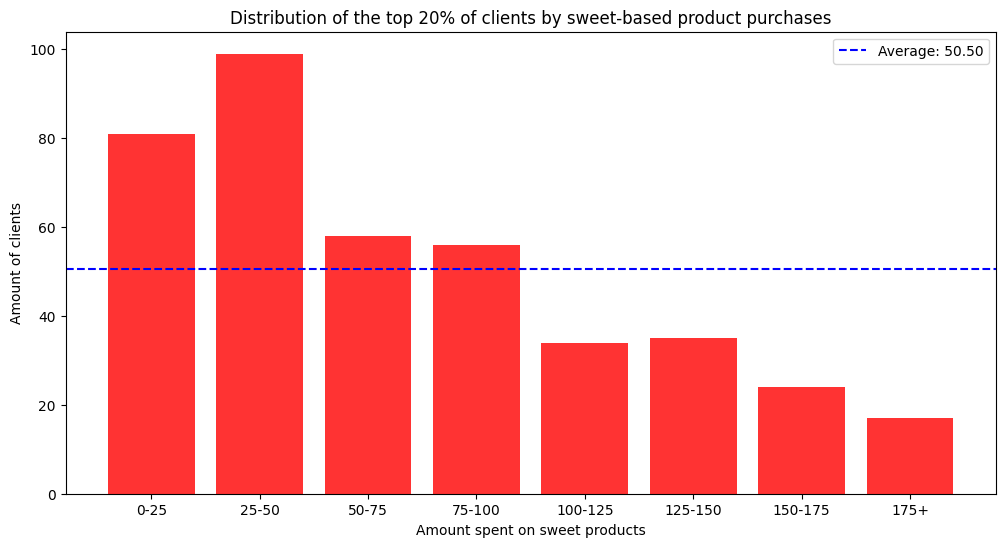

In [41]:
desired_order = labels = ['0-25', '25-50', '50-75', '75-100', '100-125', '125-150', '150-175', '175+']
MntSweetProducts_Distribution['MntSweetProducts_Interval'] = pd.Categorical(MntSweetProducts_Distribution['MntSweetProducts_Interval'], categories=desired_order, ordered=True)
MntSweetProducts_Distribution = MntSweetProducts_Distribution.sort_values('MntSweetProducts_Interval')

average_count = MntSweetProducts_Distribution['Count'].mean()

plt.figure(figsize=(12, 6))
plt.axhline(y=average_count, color='blue', linestyle='--', label=f'Average: {average_count:.2f}')
plt.bar(MntSweetProducts_Distribution['MntSweetProducts_Interval'], MntSweetProducts_Distribution['Count'], color = '#FF3333')
plt.xlabel('Amount spent on sweet products')
plt.ylabel('Amount of clients')
plt.legend()
plt.title('Distribution of the top 20% of clients by sweet-based product purchases')

# Finding correlation between the dimensions

In [42]:
clients_top20_heatmap = clients_top20.drop(columns = ['Marital_Status', 'Age_Interval', 'MntWines_Interval',
                                                      'MntFruits_Interval',	'MntMeatProducts_Interval',	'MntFishProducts_Interval',
                                                      'MntSweetProducts_Interval'])

In [43]:
clients_top20_heatmap

,Age,Customer_Days,NumWebVisitsMonth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntTotal
0,32,2496,4,1259,172,815,97,148,2491
1,29,2295,1,1156,120,915,94,144,2429
2,29,2295,1,1156,120,915,94,144,2429
3,50,2296,2,1302,68,731,89,114,2304
4,51,2406,5,1394,22,708,89,91,2304
...,...,...,...,...,...,...,...,...,...
436,55,2179,1,227,151,573,98,54,1103
437,67,2758,6,815,10,239,28,10,1102
438,55,2657,4,753,43,226,69,10,1101
439,46,2241,2,471,0,510,99,21,1101


In [44]:
corr = clients_top20_heatmap.corr()
corr2 = corr['MntTotal']

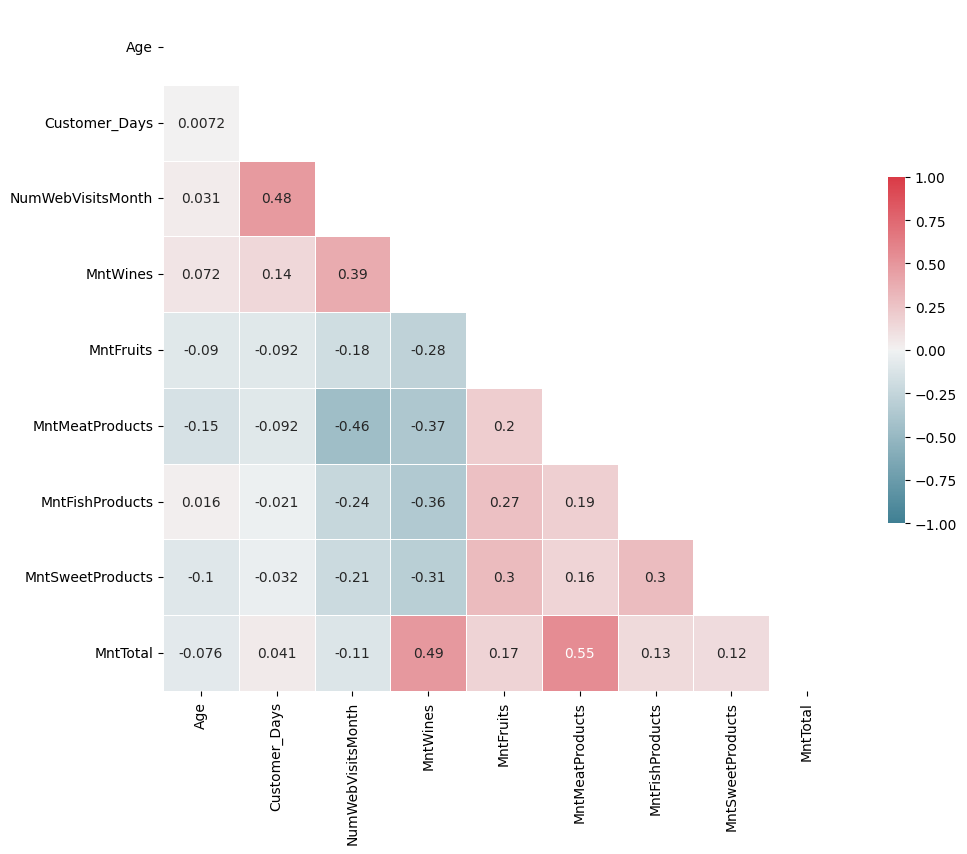

In [45]:
# Generating a heatmap
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True


f, ax = plt.subplots(figsize=(11, 9))


cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})


plt.show()

The objective of this analysis is to help the Marketing team achieve better results in their next campaign.

The column in our dataset that quantifies the results is 'MntTotal', which represents the total revenue with that client, during the period when the data was collected.

By performing the heatmap above and analyzing the last row of it, we can analyze the correlation between Revenue and the other dimensions, where we can observe:

* Revenue x Age, time as a customer, number of visits to the website, fruit purchases, fish purchases, and sweet purchases: **Weak Correlation**

*  Revenue x Wine Purchases and Meat Product Purchases: **Strong Correlation**

Thus, we will perform analyses of the 'MntTotal' revenue based on the other factors, with scatter plots and the behavior of the isolated variables.

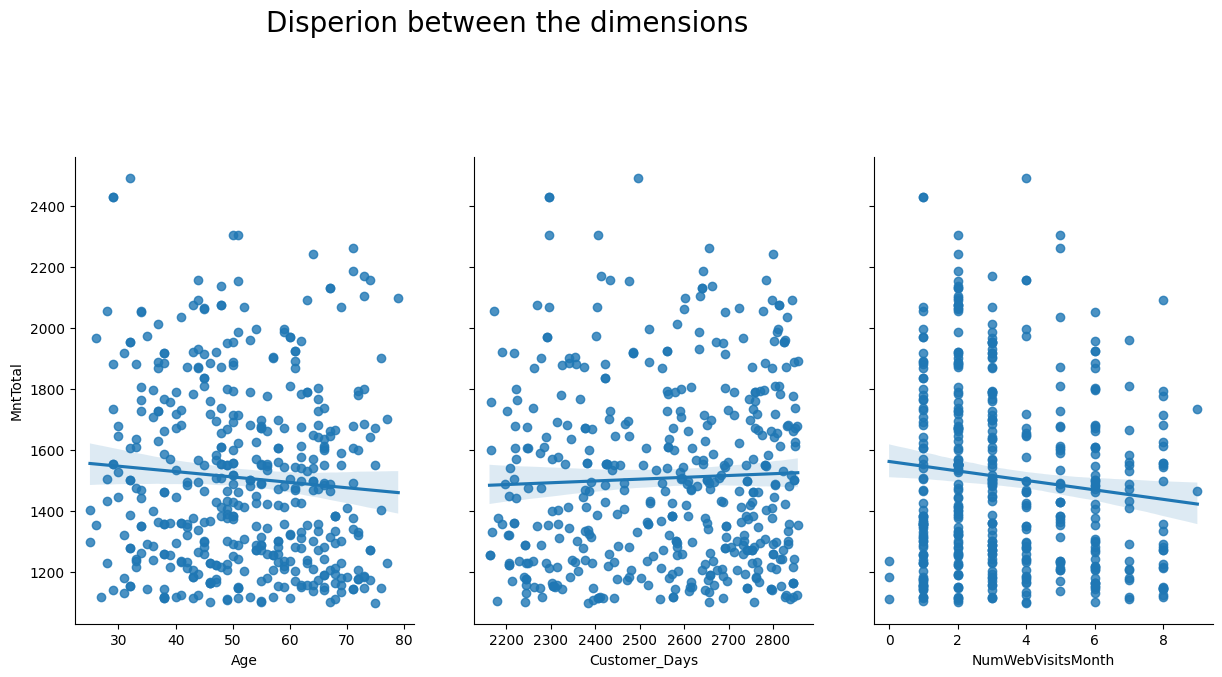

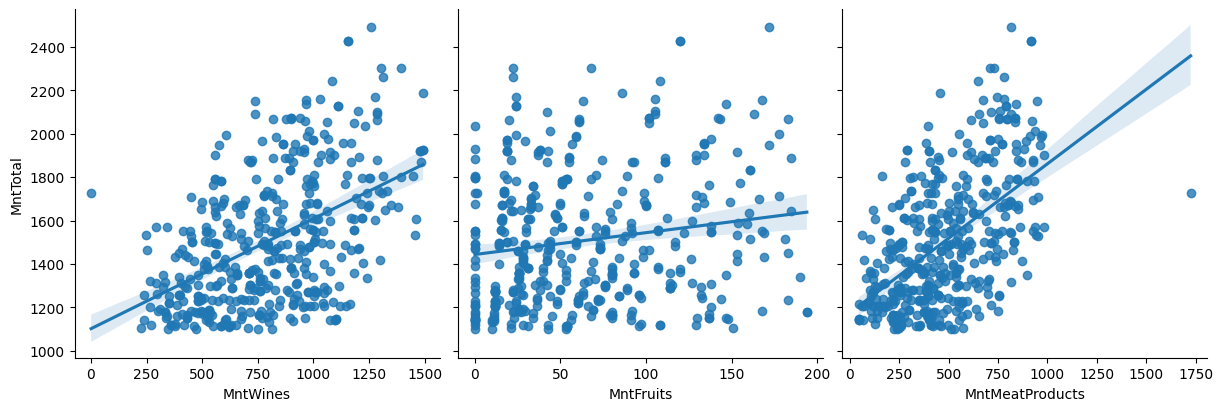

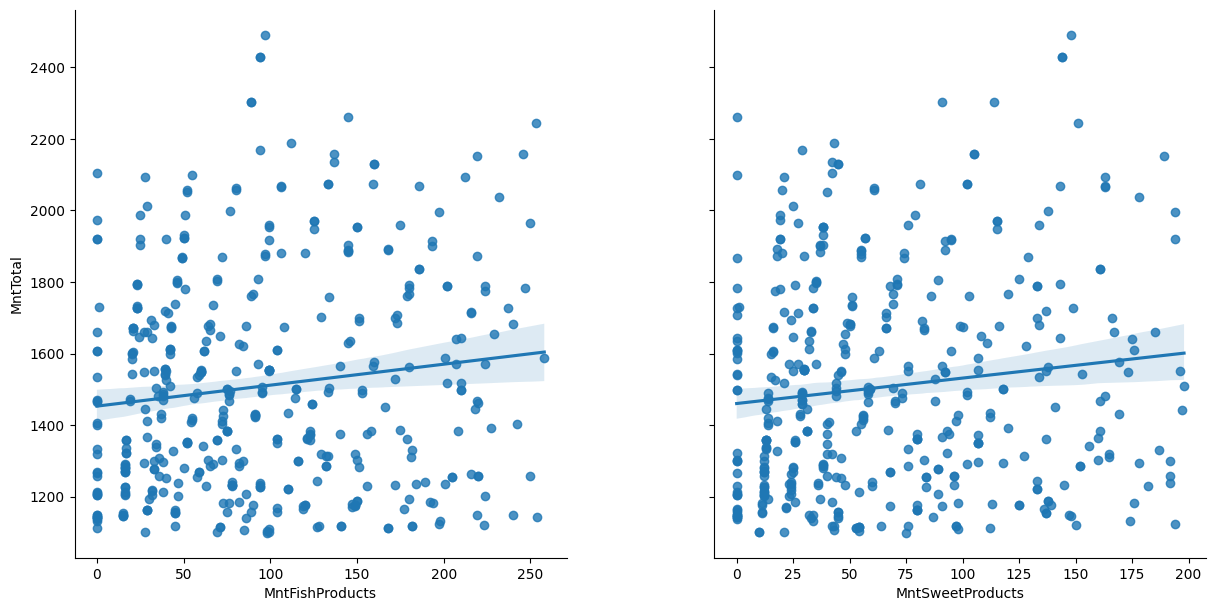

In [46]:
import matplotlib.pyplot as plt

ax = sns.pairplot(data = clients_top20, y_vars = 'MntTotal', x_vars = ['Age', 'Customer_Days', 'NumWebVisitsMonth'], height = 1.18, kind = 'reg')
sns.pairplot(data = clients_top20, y_vars = 'MntTotal', x_vars = ['MntWines', 'MntFruits', 'MntMeatProducts'], height = 4.14, kind = 'reg')
sns.pairplot(data = clients_top20, y_vars = 'MntTotal', x_vars = ['MntFishProducts', 'MntSweetProducts'], height = 6.175, kind = 'reg')

ax.figure.set_size_inches(15, 10) # Increased figure size to accommodate 3 charts per row
ax.fig.suptitle('Disperion between the dimensions', fontsize=20, y=1.05)

# Adjust subplot parameters for a tighter layout
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax

In [47]:
distribuicao_Faturamento_Carne = clients_top20['MntMeatProducts'].tolist()
distribuicao_Faturamento_Vinho = clients_top20['MntWines'].tolist()
distribuicao_Faturamento_Total = clients_top20['MntTotal'].tolist()

distribuicao_Faturamento_Carne_Vinho = pd.concat([pd.Series(distribuicao_Faturamento_Carne), pd.Series(distribuicao_Faturamento_Vinho)], axis=1)
distribuicao_Faturamento_Carne_Vinho.rename(columns={0: 'Vinho', 1: 'Carne'})


,Vinho,Carne
0,815,1259
1,915,1156
2,915,1156
3,731,1302
4,708,1394
...,...,...
436,573,227
437,239,815
438,226,753
439,510,471


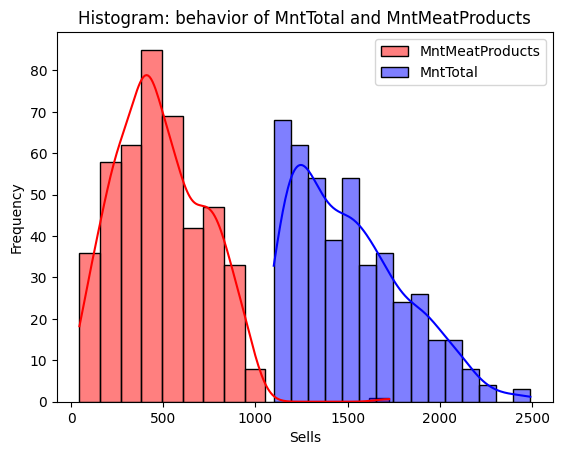

In [50]:
#Analisando a distribuição da compra de produtos ocm carne a da Receita Total


ax = sns.histplot(distribuicao_Faturamento_Carne, bins = 15, kde = True, label = 'MntMeatProducts', color = 'Red')
sns.histplot(distribuicao_Faturamento_Total, bins = 15, kde = True, label = 'MntTotal', color = 'Blue')

plt.xlabel('Sells')
plt.ylabel('Frequency')
plt.title('Histogram: behavior of MntTotal and MntMeatProducts')
plt.legend()
plt.show()

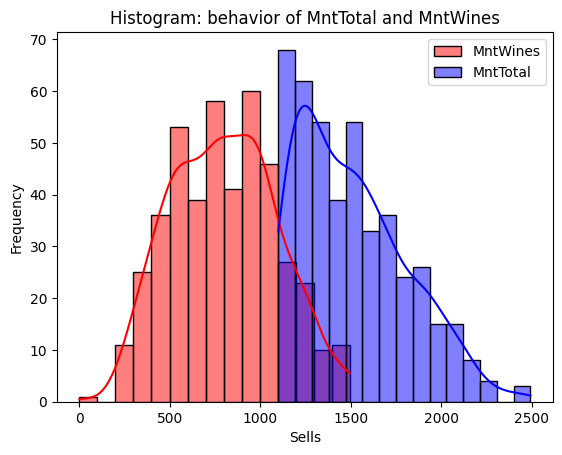

In [51]:
#Analisando a distribuição da compra de produtos Vinho a da Receita Total


ax = sns.histplot(distribuicao_Faturamento_Vinho, bins = 15, kde = True, label = 'MntWines', color = 'Red')
sns.histplot(distribuicao_Faturamento_Total, bins = 15, kde = True, label = 'MntTotal', color = 'Blue')

plt.xlabel('Sells')
plt.ylabel('Frequency')
plt.title('Histogram: behavior of MntTotal and MntWines')
plt.legend()
plt.show()

# **Descritive and graphic Analysis: Result**

Based on these results, a suggested action is to focus on reaching the following consumer profile, which represents the standard of the customer who is among the top 20% most profitable in the entire operation:

# Cluster: Top 20% of Clients with the Highest Spending (451 clients)
* The majority consists of clients aged 60+ (30.39%). When we analyze the 40+ group, which includes 60+, this measure reaches 78.24%.
* The majority is married (38.32%), with 63.49% being either 'Married' or 'Living together.'
* Younger clients are in the minority, but they tend to make higher-ticket purchases.
* The preferred consumption of this group is Wines and Meat Products, with a strong correlation between the consumption of these and total spending. Also, the total spend amount and the amount spent on these two types of products have similar statistical behavior.
* Few visits to the website (probably only to make purchases).